In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, math
import warnings
warnings.filterwarnings("ignore")

def get_df_single_round(reports_path):
    '''
    Return performance dataframes. 
    '''
    df_ls1 = []
    file_list = sorted(os.listdir(reports_path))
    file_list = [file for file in file_list if 'report' in file and '.html' in file]
    for file in file_list:
        df_ls = pd.read_html(os.path.join(reports_path, file), flavor='bs4')
        df_perf=df_ls[0]
        rates = int(file.split('-')[2])
        df_perf['Rate'] = rates
        df_ls1.append(df_perf)
    df = pd.concat(df_ls1)
    return df


def get_report_stats_dfs(df: pd.DataFrame):
  df1 = df[df.Name == df.Name.unique()[0]]
  df1 = df1[(df1.Succ == df1.Rate) & (df1.Rate != 90.0)]
  df1['Avg Latency (s)'] = df1['Avg Latency (s)'].astype('float64')
  df1 = df1.groupby(by=['Succ']).mean()

  df2 = df[df.Name == df.Name.unique()[1]]
  df2 = df2[(df2.Succ == df2.Rate) & (df2.Rate != 90.0)]
  # df2 = df2[(df2.Succ != 0) & (df2.Rate != 90.0)]
  df2['Avg Latency (s)'] = df2['Avg Latency (s)'].astype('float64')
  df2 = df2.groupby(by=['Succ']).mean()
  return df1, df2

def plot_perf(reports_path: str, title: str)-> None:
  df = get_df_single_round(reports_path)
  df1, df2 = get_report_stats_dfs(df)
  fig, ax = plt.subplots()
  rates = df1['Rate'].values.astype('int')
  tps1 = df1['Throughput (TPS)'].values
  lat1 = df1['Avg Latency (s)'].values
  tps2 = df2['Throughput (TPS)'].values
  lat2 = df2['Avg Latency (s)'].values

  ax.plot(rates, tps1, marker='*', color='tab:red', label=df.Name.unique()[0])
  ax.plot(rates, tps2, marker='d', color='tab:blue', label=df.Name.unique()[1])
  ax.set(xticks=rates, xticklabels=rates, xlabel='Send Rate', ylabel='Throughput (TPS)')
  ax.grid()

  ax2 = ax.twinx()
  ax2.plot(rates, lat1, '--', marker='*', color='tab:red', label=df.Name.unique()[0])
  ax2.plot(rates, lat2, '--', marker='d', color='tab:blue', label=df.Name.unique()[1])
  ax2.set(ylabel='Latency (S)')
  ax2.set_ylim(bottom=0, top=2)

  handles1, labels1 = ax.get_legend_handles_labels()
  handles2, labels2 = ax2.get_legend_handles_labels()

  ax2.legend((*handles1, *handles2), (*len(labels1)*[''], *labels2), title='TPS  Latency                      ',
              ncol=2, handlelength=2, edgecolor='black', loc='best',
              borderpad=0.5, handletextpad=1, columnspacing=0)
  plt.tight_layout()
  plt.show()
  fig.savefig(fname=title+'.png', format='png')
  fig.savefig(fname=title+'.pdf', format='pdf')

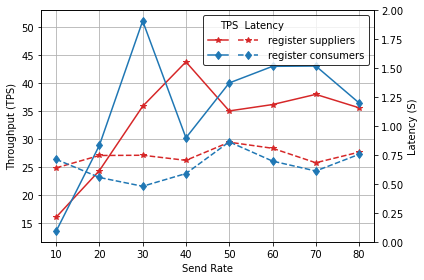

In [2]:
reports_path = './reports-single-receiver/registry/'
plot_perf(reports_path=reports_path, title='Register Performane')

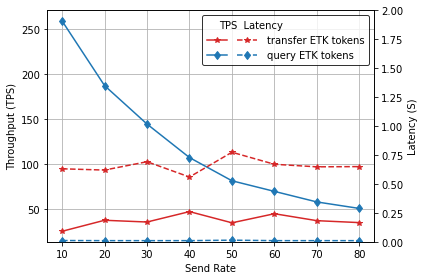

In [3]:
reports_path = './reports-single-receiver/etk/'
plot_perf(reports_path=reports_path, title='Energy Token Performane')

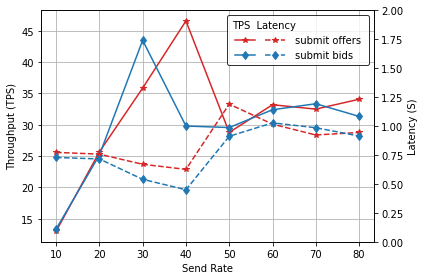

In [4]:
reports_path = './reports-single-receiver/market/'
plot_perf(reports_path=reports_path, title='Market Performane')

In [14]:
reports_path = './reports/market/'
df = get_df_single_round(reports_path)
df

,Name,Succ,Fail,Send Rate (TPS),Max Latency (s),Min Latency (s),Avg Latency (s),Throughput (TPS),Rate
0,submit offers,10,0,476.2,0.75,0.73,0.74,13.2,10
1,submit bids,10,0,285.7,0.74,0.70,0.71,13.6,10
0,submit offers,10,0,303.0,0.68,0.63,0.65,14.7,10
1,submit bids,10,0,400.0,0.78,0.76,0.77,12.7,10
0,submit offers,10,0,270.3,0.59,0.55,0.57,16.9,10
...,...,...,...,...,...,...,...,...,...
1,submit bids,10,80,41.5,1.02,0.79,0.9,30.3,90
0,submit offers,80,10,40.7,1.50,0.48,0.98,29.5,90
1,submit bids,10,80,43.4,1.19,0.99,1.09,29.4,90
0,submit offers,58,32,44.8,1.41,0.60,1.05,31.7,90


In [15]:
df1, df2 = get_report_stats_dfs(df)

rates = df1['Rate'].values.astype('int')
tps1 = df1['Throughput (TPS)'].values
lat1 = df1['Avg Latency (s)'].values
tps2 = df2['Throughput (TPS)'].values
lat2 = df2['Avg Latency (s)'].values

In [7]:
rates

array([10, 20, 30, 40, 50, 60, 70, 80])

In [8]:
tps1

array([13.   , 25.675, 35.86 , 39.52 , 28.78 , 33.2  , 32.5  , 34.075])

In [9]:
lat1

array([0.773     , 0.7575    , 0.67      , 0.746     , 1.19      ,
       1.01666667, 0.92333333, 0.945     ])

In [16]:
tps2

array([18.87333333, 25.16      , 43.48      , 29.56      , 32.4       ,
       33.36      , 31.34      ])

In [11]:
df2

,Fail,Send Rate (TPS),Max Latency (s),Min Latency (s),Avg Latency (s),Throughput (TPS),Rate
Succ,,,,,,,
10,0.0,383.30,0.743,0.714,0.729,13.35,10.0
20,0.0,141.86,0.806,0.670,0.716,25.16,20.0
30,0.0,160.08,0.722,0.400,0.540,43.48,30.0
50,0.0,84.82,1.272,0.606,0.912,29.56,50.0
60,0.0,67.76,1.462,0.486,1.028,32.40,60.0
70,0.0,58.66,1.484,0.448,0.986,33.36,70.0
80,0.0,48.04,1.466,0.234,0.914,31.34,80.0
